

# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The TMDb dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This report aims to answer the following questions :  
>> **Research Question 1: How have movies changed over the years?**  
    >>>- How has the popularity of movies changed with time?  
- Which genres are most popular from year to year?   
- What are the trending keywords over the years?  
- Are costs for making movies increasing year by year? What about profits?  
- is there any observable trend in runtime?  

>> **Research Question 2: What kinds of properties are associated with movies that have high revenues?**
>>> - Are movies that generate high revenues more popular?  
- what is the average runtime of high-revenue movies?
- What budgets are associated with high-revenue movies?
- Which genres do high-revenue movies comprise of? 
- What keywords occur in high revenue movies?  

>> **Research Question 3: Who are the people assscoiated with hit (popular high-revenue) movies?**
>>>  - Who are the successful actors?
 - Who are the successful directors?
 - Which are the successful production houses?  
 - Who are the successful director-actor combinations?

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to generate wordclouds
from wordcloud import WordCloud, STOPWORDS
#to generate masks for wordclouds
from PIL import Image
sns.set_style('darkgrid')


#to make sure visualisations pop up in notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Inspection

In [2]:
#load csv file into DataFrame
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#what are the columns present?
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Set index for DataFrame

In [5]:
#Does id have any duplicates? 
print(df.id.duplicated().any(), df.id.duplicated().sum())

True 1


In [6]:
#what do the duplicate rows look like?
df.loc[df.id.duplicated(keep = False), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
#drop all rows where id is duplicated so that we can set it as index
df.drop_duplicates(subset='id', inplace=True)
#check for successful drop
df.id.duplicated().any()

False

In [8]:
#make id the index
df.set_index('id', inplace=True)

### Trim columns which will not be used for the analysis

In [9]:
#trim columns that will not be used
df.drop(columns=['imdb_id','budget', 'revenue', 'homepage', 'overview','release_date', 'tagline', 'vote_count' ], inplace=True)


In [10]:
df.head(1)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09


### Assess phase

In [11]:
#number of rows and columns
df.shape

(10865, 12)

In [12]:
#data type of each column
df.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [13]:
#duplicates in every column
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
#look at all 0 values
df.isin([0]).sum()

popularity                 0
original_title             0
cast                       0
director                   0
keywords                   0
runtime                   31
genres                     0
production_companies       0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

> **Insights from assess phase:**  
- The DataFrame has been reduced to a manageable 12 columns  
- There are no duplicates  
- The data types are appropriate  
- columns 'cast', 'director' and 'genres' have few null values whereas 'keywords' and 'production_companies' have many  
- columns 'runtime', 'budget_adj' and 'revenue_adj' have many 0 values

### Cleaning phase
> **Cleaning decisions:**  
- drop null values in 'cast', 'director' and 'genres' as these are few in number
- replace 0 values in 'runtime', 'revenue' and 'budget' with NAN

In [17]:
#drop null values
df.dropna(subset=['cast', 'director', 'genres'], how='any', inplace=True)

In [18]:
#handle 0 values in runtime, revenue and budget
df.replace(to_replace=0, value=np.NAN, inplace=True)

In [19]:
df.isin(['0']).sum().any()

False

In [20]:
#confirm drop of rows
df.isnull().sum()

popularity                 0
original_title             0
cast                       0
director                   0
keywords                1425
runtime                   28
genres                     0
production_companies     959
vote_average               0
release_year               0
budget_adj              5578
revenue_adj             5888
dtype: int64

## Reassess phase

In [21]:
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10703.000000,10731.000000,10731.000000,5.153000e+03,4.843000e+03
mean,0.652615,102.736896,5.964710,2001.259622,3.699582e+07,1.152341e+08
std,1.004804,30.079331,0.930283,12.820151,4.198202e+07,1.989424e+08
min,0.000188,3.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,90.000000,5.400000,1995.000000,8.142944e+06,1.048057e+07
50%,0.387081,99.000000,6.000000,2006.000000,2.287867e+07,4.402879e+07
75%,0.720889,112.000000,6.600000,2011.000000,5.024535e+07,1.317599e+08
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
#unique keywords
s = pd.Series(df.keywords.str.cat(sep='|').split('|'))
s.nunique()

7834

In [23]:
#unique genres
s = pd.Series(df.genres.str.cat(sep='|').split('|'))
s.nunique()

20

In [24]:
#does director column also contain pipe symbols?
df['director'].str.contains('|', regex=False).any()

True

In [25]:
#unique directors
s = pd.Series(df.director.str.cat(sep='|').split('|'))
s.nunique()

5298

In [26]:
print(df.release_year.nunique())
df.release_year.unique()

56


array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

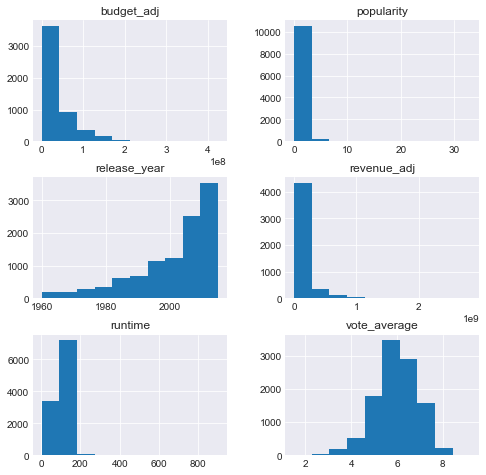

In [27]:
df.hist(figsize=(8,8));

> *Most distributions are skewed to the right*

### Break up main DataFrame  
> move cast, director, keywords, genres and production_companies to different DataFrames

In [28]:

# get genre frame
genres = df[['genres']]
genres = pd.DataFrame(data = genres.genres.str.split('|').tolist(), index=genres.index).stack()
genres = genres.reset_index()[['id',0]] # genre is currently labeled 0
genres.columns = ['id', 'genre'] # renaming
genres.set_index('id', inplace=True)
genres.head()

,genre
id,
135397,Action
135397,Adventure
135397,Science Fiction
135397,Thriller
76341,Action


In [29]:
df.drop(columns='genres', inplace=True, errors='ignore')
#confirm drop
df.head(1)

,popularity,original_title,cast,director,keywords,runtime,production_companies,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09


In [30]:
#get cast frame
cast = df[['cast']]
cast = pd.DataFrame(data = cast.cast.str.split('|').tolist(), index = cast.index).stack()
cast = cast.reset_index()[['id',0]]
cast.columns = ['id', 'cast']
cast.set_index('id', inplace=True)
cast.head()

,cast
id,
135397,Chris Pratt
135397,Bryce Dallas Howard
135397,Irrfan Khan
135397,Vincent D'Onofrio
135397,Nick Robinson


In [31]:
#drop cast column
df.drop(columns='cast', inplace=True, errors='ignore')
#confirm drop
'cast' in df.columns

False

In [32]:
#get director frame
directors = df[['director']]
directors = pd.DataFrame(data = directors.director.str.split('|').tolist(), index=directors.index).stack()
directors=directors.reset_index()[['id',0]]
directors.columns = ['id', 'director']
directors.set_index('id',inplace=True)
directors.head()

,director
id,
135397,Colin Trevorrow
76341,George Miller
262500,Robert Schwentke
140607,J.J. Abrams
168259,James Wan


In [33]:
#drop director column
df.drop(columns='director', inplace=True, errors='ignore')
#confirm drop
'director' in df.columns

False

In [34]:
#get keywords frame
keywords = df[['keywords']]
keywords = pd.DataFrame(data = keywords.keywords.astype(str).str.split('|').tolist(), index= keywords.index).stack()
keywords = keywords.reset_index()[['id', 0]]
keywords.columns = ['id','keyword']
keywords.set_index('id', inplace=True)
#handle 'nan' in keywords
keywords.keyword.replace(to_replace='nan', value=np.NAN, inplace=True)
#handle 'nan' in keywords
keywords.dropna(inplace=True)
keywords.head()

,keyword
id,
135397,monster
135397,dna
135397,tyrannosaurus rex
135397,velociraptor
135397,island


In [35]:
#drop kewords column
df.drop(columns='keywords',inplace=True,errors='ignore')
#confirm drop
'keywords' in df.columns

False

In [36]:
#get production_companies frame
production_companies= df[['production_companies']]
production_companies = pd.DataFrame(data = production_companies.production_companies.astype(str).str.split('|').tolist(), index= production_companies.index).stack()
production_companies = production_companies.reset_index()[['id', 0]]
production_companies.columns = ['id','production_companies']
production_companies.set_index('id', inplace=True)
production_companies.head()

,production_companies
id,
135397,Universal Studios
135397,Amblin Entertainment
135397,Legendary Pictures
135397,Fuji Television Network
135397,Dentsu


In [37]:
#drop production_companies column
df.drop(columns='production_companies',inplace=True,errors='ignore')
#confirm drop
'production_companies' in df.columns

False

In [38]:
df.shape

(10731, 7)

### Create bins  
> create bins for decade, popularity and revenue 

In [39]:
#for decade
labels = ['60s', '70s', '80s', '90s', '2000-2010', '2010-2015']
df['decade'] = pd.cut(df.release_year, bins=[1960,1969, 1979, 1989,1999,2009,2015], include_lowest=True,labels=labels)
df.decade.head()

id
135397    2010-2015
76341     2010-2015
262500    2010-2015
140607    2010-2015
168259    2010-2015
Name: decade, dtype: category
Categories (6, object): [60s < 70s < 80s < 90s < 2000-2010 < 2010-2015]

In [40]:
#for popularity
df.popularity.describe()

count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

In [41]:
df.popularity.describe()['min':].tolist()

[0.000188, 0.2107655, 0.387081, 0.7208895, 32.985763]

In [42]:
bin_labels=['unpopular','not_so_popular','quite_popular', 'very_popular']
df['popularity_level'] = pd.cut(df.popularity, bins=df.popularity.describe()['min':].tolist(),labels=bin_labels, include_lowest=True) 
df.popularity_level.head()

id
135397    very_popular
76341     very_popular
262500    very_popular
140607    very_popular
168259    very_popular
Name: popularity_level, dtype: category
Categories (4, object): [unpopular < not_so_popular < quite_popular < very_popular]

In [43]:
df.revenue_adj.describe()

count    4.843000e+03
mean     1.152341e+08
std      1.989424e+08
min      2.370705e+00
25%      1.048057e+07
50%      4.402879e+07
75%      1.317599e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [44]:
#cut into revenue bins
df['revenue_level'] = pd.cut(df.revenue_adj, bins=(df.revenue_adj.describe()['min':]).tolist(), labels=['very_low', 'low', 'medium', 'high'])
df['revenue_level'].head()


id
135397    high
76341     high
262500    high
140607    high
168259    high
Name: revenue_level, dtype: category
Categories (4, object): [very_low < low < medium < high]

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1: How have movies changed over the years?
> - How has the popularity of movies changed with time?  
- Which genres are most popular from year to year?   
- What are the trending keywords in the last 20 words?  
- Are costs for making movies increasing year by year? What about profits?  
- is there any observable trend in runtime? 

### How has the popularity of movies changed with time?

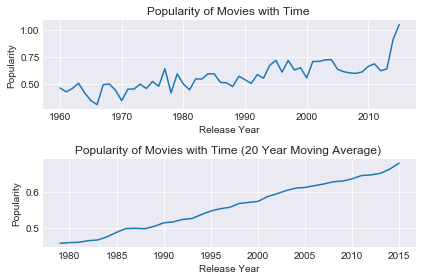

In [45]:
#find mean popularity of movies for every year
s = df.groupby('release_year').mean().popularity
rel_yr = s.index
pop = s
pop20 = s.rolling(20).mean()

plt.subplot(2,1,1)
plt.title('Popularity of Movies with Time ')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.tight_layout()
plt.plot(rel_yr, pop);

plt.subplot(2,1,2)
plt.title('Popularity of Movies with Time (20 Year Moving Average) ')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.tight_layout()
plt.plot(rel_yr, pop20);



Text(0,0.5,'Number of Movies')

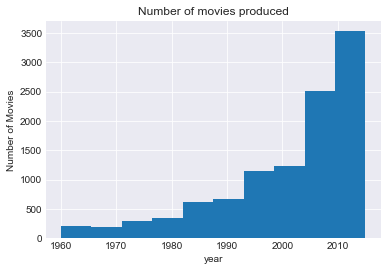

In [46]:
plt.hist(df.release_year);
plt.title('Number of movies produced')
plt.xlabel('year')
plt.ylabel('Number of Movies')

*Movies are becoming more popular year by year.The movie industry is also producing more movies every year* 

### Which are the most popular genres from year to year?

In [47]:
#merge with genres
df_merged = pd.merge(df, genres, how='inner', on='id',  sort=False)[['release_year', 'genre', 'popularity']]
df_merged.head()

,release_year,genre,popularity
id,,,
135397,2015,Action,32.985763
135397,2015,Adventure,32.985763
135397,2015,Science Fiction,32.985763
135397,2015,Thriller,32.985763
76341,2015,Action,28.419936


In [48]:
#for every year, get the mean popularity of each genre
df_temp = df_merged.groupby(['release_year','genre']).mean().popularity.to_frame()
df_temp=df_temp.reset_index()
df_temp.head()


,release_year,genre,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305


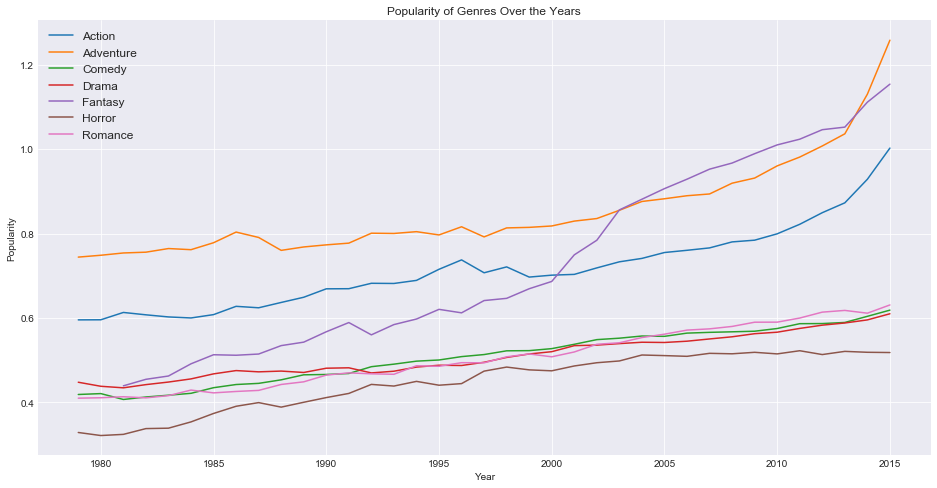

In [49]:
g_list = ['Action','Adventure','Comedy', 'Drama',
       'Fantasy', 'Horror','Romance']

plt.figure(figsize=(16,8))
plt.title('Popularity of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Popularity')

for g in g_list:
    d = df_temp.query('genre == "%s" ' % g)[['release_year','popularity']]
    plt.plot(d.release_year, d.popularity.rolling(20).mean(), label='%s' % g);

plt.legend(loc='upper left', fontsize='large');


*Fantasy films peaked in the early two thousands probably owing to the release of the hugely popular Lord of the Rings franchise at that time*

### What are the trending movie keywords over the years?

In [50]:
df_pop = df.query('popularity_level == "very_popular"')
df_merged  = pd.merge(df_pop, keywords, on = 'id', how = 'inner', sort=False)

gb = df_merged.groupby('decade')

d1 = gb['keyword'].get_group('60s')
d2 = gb['keyword'].get_group('70s')
d3 = gb['keyword'].get_group('80s') 
d4 = gb['keyword'].get_group('90s')
d5 = gb['keyword'].get_group('2000-2010')
d6 = gb['keyword'].get_group('2010-2015')

n=10

s1 = d1.value_counts()[:n]
s2 = d2.value_counts()[:n]
s3 = d3.value_counts()[:n]
s4 = d4.value_counts()[:n]
s5 = d5.value_counts()[:n]
s6 = d6.value_counts()[:n]

s= [s1, s2, s3, s4, s5, s6]

l=list()
# each item in l is a dictionary
for n in s:
    l.append(n.to_dict())
    

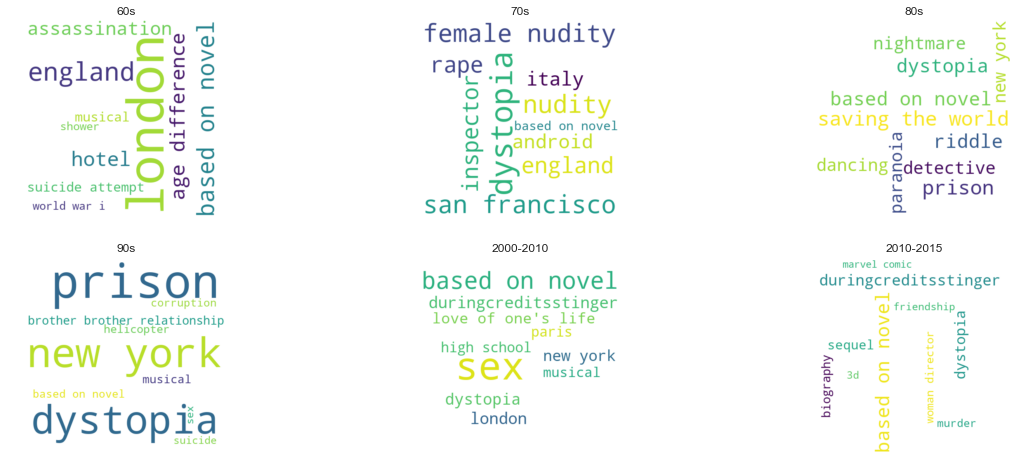

In [51]:
titles = ['60s', '70s', '80s', '90s', '2000-2010', '2010-2015']

fig = plt.figure(figsize=(20,8))


for i in range(len(l)) :    
    text= l[i]   
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title(titles[i])
    # Create the wordcloud object
    wordcloud = WordCloud(width=480, height=480, margin=0, background_color='white', min_font_size=10, prefer_horizontal=0.8).generate_from_frequencies(text)
 
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.margins(x=0, y=0)
    ax.axis("off")
    
             

    

*It is interesting to observe the trend in cities - from London to San Fran and Italy to NYC. The 70's keywords clearly depict the prevalence of adult films at the time. Also prison movies seem to have been popular in the 80s and 90s.Women directors seem to be gaining prominence after 2010*

### Are costs for making movies increasing year by year? What about profits?

In [52]:
df_temp = df[['decade','budget_adj','revenue_adj']]
pd.options.mode.chained_assignment = None
sub = df_temp.revenue_adj - df_temp.budget_adj
df_temp['profit'] = sub
df_temp.head()

,decade,budget_adj,revenue_adj,profit
id,,,,
135397,2010-2015,1.379999e+08,1.392446e+09,1.254446e+09
76341,2010-2015,1.379999e+08,3.481613e+08,2.101614e+08
262500,2010-2015,1.012000e+08,2.716190e+08,1.704191e+08
140607,2010-2015,1.839999e+08,1.902723e+09,1.718723e+09
168259,2010-2015,1.747999e+08,1.385749e+09,1.210949e+09


In [53]:
#get yearwise
df_temp=df_temp.groupby('decade').mean()
df_temp

,budget_adj,revenue_adj,profit
decade,,,
60s,3.191237e+07,2.498845e+08,2.343060e+08
70s,2.333500e+07,2.369834e+08,2.480495e+08
80s,2.652187e+07,9.983508e+07,9.766097e+07
90s,4.424838e+07,1.183364e+08,9.171738e+07
2000-2010,4.076491e+07,1.103504e+08,7.490704e+07
2010-2015,3.331979e+07,1.018244e+08,8.780208e+07


In [54]:
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df_temp.budget_adj, df_temp.revenue_adj, df_temp.profit)]
b = [i / j * 100 for i,j in zip(df_temp.budget_adj, totals)]
r = [i / j * 100 for i,j in zip(df_temp.revenue_adj, totals)]
p = [i / j * 100 for i,j in zip(df_temp.profit, totals)]


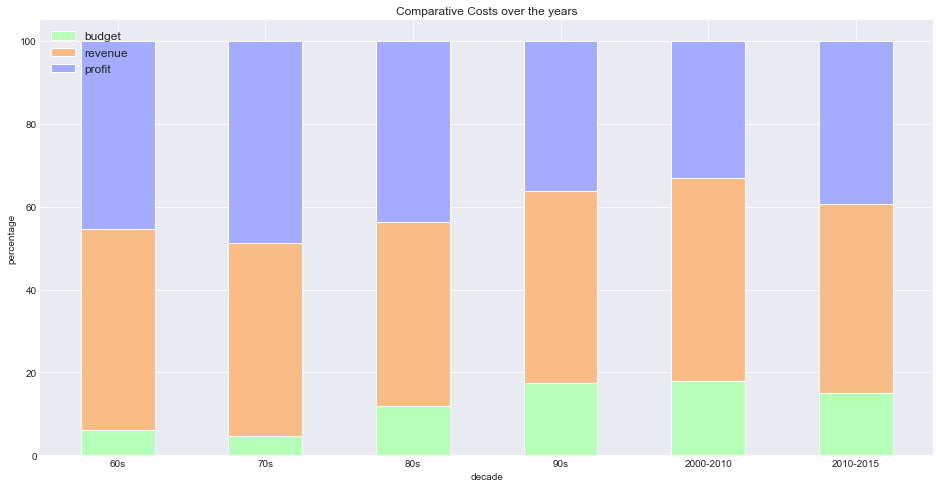

In [55]:
# plot
plt.figure(figsize=(16,8))
x = np.arange(6)
barWidth = 0.5
names = list(df_temp.index.astype(str))

# Create green Bars
plt.bar(x, b, color='#b5ffb9', edgecolor='white', width=barWidth, label='budget')
# Create orange Bars
plt.bar(x, r, bottom=b, color='#f9bc86', edgecolor='white', width=barWidth, label = 'revenue')
# Create blue Bars
plt.bar(x, p, bottom=[i+j for i,j in zip(b,r)], color='#a3acff', edgecolor='white', width=barWidth, label ='profit')

# Custom axes
plt.title('Comparative Costs over the years')
plt.xlabel("decade")
plt.xticks(x, names)
plt.ylabel('percentage')

#legend
plt.legend( loc='upper left',fontsize='large');


*What stands out in this chart are the remarkably low budgets in the 70s. A quick search reveals that that the 70s saw the emergence of the 'No Wave Movement' which produced many notable low budget films*

### Is there any observable trend in runtime over the years?

In [56]:
df_temp = df.groupby('release_year').mean().runtime.to_frame()
x =df_temp.index
y = df_temp.runtime


array([[ 1.        , -0.73600556],
       [-0.73600556,  1.        ]])

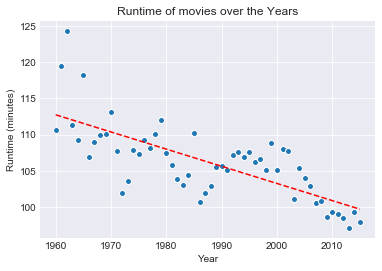

In [57]:
plt.scatter(x,y, edgecolors='white');

plt.title('Runtime of movies over the Years')
plt.ylabel('Runtime (minutes)')
plt.xlabel('Year')
# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
# the line equation:

c = np.corrcoef(x,y)
c

*Runtime of movies seems to be decreasing. correlation coefficient is -0.73. There is  a strong negative correlation*

##  What kinds of properties are associated with movies that have high revenues?
> - Are movies that generate high revenues more popular?  
- what is the average runtime of high-revenue movies?
- What budgets are associated with high-revenue movies?
- Which genres do high-revenue movies comprise of? 
- What keywords occur in high revenue movies?

### Are movies that generate high revenues more popular?

In [58]:
#DataFrames split on revenue
df_high = df.query('revenue_level == "high" ')
df_medium = df.query('revenue_level == "medium" ')
df_low = df.query('revenue_level == "low" ')
df_very_low = df.query('revenue_level == "very_low" ')

In [59]:
df_pop = pd.DataFrame()

df_pop['high'] = df_high.groupby('decade').mean().popularity.tolist()
df_pop['medium'] = df_medium.groupby('decade').mean().popularity.tolist()
df_pop['low'] = df_low.groupby('decade').mean().popularity.tolist()
df_pop['very_low'] = df_very_low.groupby('decade').mean().popularity.tolist()

df_pop

,high,medium,low,very_low
0,1.356702,0.577186,0.456226,0.343327
1,1.219522,0.556618,0.634912,0.246486
2,1.420048,0.695054,0.452956,0.317530
3,1.488898,0.728484,0.574269,0.407767
4,1.887455,0.977381,0.615156,0.431490
5,3.306503,1.536937,1.081297,0.595080


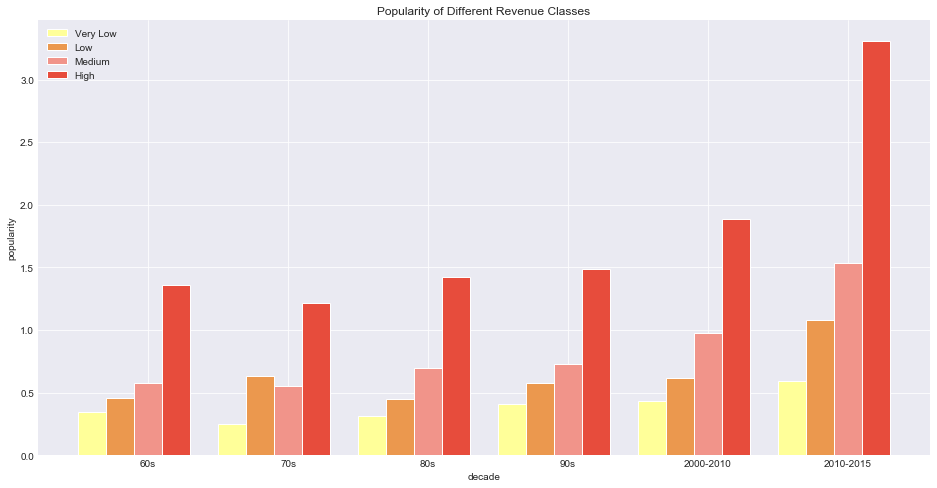

In [60]:
plt.figure(figsize=(16,8))
# set width of bar
barWidth = 0.4
 
# set height of bar
bars1 = df_pop.very_low
bars2 = df_pop.low
bars3 = df_pop.medium
bars4 = df_pop.high

# Set position of bar on X axis
r1 = np.arange(len(bars1)) * 2
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, color='#FFFF99', width=barWidth, edgecolor='white', label='Very Low')
plt.bar(r2, bars2, color='#EB984E', width=barWidth, edgecolor='white', label='Low')
plt.bar(r3, bars3, color='#F1948A'  , width=barWidth, edgecolor='white', label='Medium')
plt.bar(r4, bars4, color='#E74C3C', width=barWidth, edgecolor='white', label='High')

# Add xticks on the middle of the group bars
plt.title('Popularity of Different Revenue Classes')
plt.xlabel('decade')
plt.ylabel('popularity')
plt.xticks([r for r in r3], ['60s', '70s', '80s', '90s', '2000-2010', '2010-2015'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


*In every decade high revenue movies enjoy greater popularity*

### what is the average runtime of high-revenue movies?

In [61]:
df_runtime  = pd.DataFrame()
very_low = df_very_low.mean().runtime
low = df_low.mean().runtime
medium = df_medium.mean().runtime
high = df_high.mean().runtime

In [62]:
#average runtime of high revenue movies
high

116.40792733278282

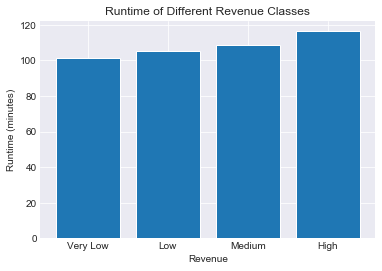

In [63]:
height = [very_low, low, medium, high]
bars = ('Very Low', 'Low', 'Medium', 'High')
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, height,edgecolor='white')
 
# Create names on the x-axis
plt.title('Runtime of Different Revenue Classes')
plt.xlabel('Revenue')
plt.ylabel('Runtime (minutes)')
plt.xticks(x_pos, bars);

### What budgets are associated with high-revenue movies?

In [64]:
df_runtime  = pd.DataFrame()
very_low = df_very_low.mean().budget_adj
low = df_low.mean().budget_adj
medium = df_medium.mean().budget_adj
high = df_high.mean().budget_adj

In [65]:
#average budget of high revenue movies
high

81001508.27751902

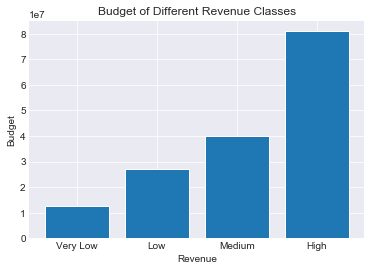

In [66]:
# Make a fake dataset:
height = [very_low, low, medium, high]
bars = ('Very Low', 'Low', 'Medium', 'High')
x_pos = np.arange(len(bars))
 
# Create bars
plt.bar(x_pos, height, edgecolor='white')
 
# Create names on the x-axis
plt.title('Budget of Different Revenue Classes')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.xticks(x_pos, bars);

*budgets for high revenue movies are higher*

### Which genres do high-revenue movies comprise of?

In [67]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_merged  = pd.merge(df_high, genres, on = 'id', how = 'inner', sort=False)
s=df_merged['genre'].value_counts()
s.head()

Action       468
Drama        434
Comedy       433
Adventure    401
Thriller     358
Name: genre, dtype: int64

In [68]:
#add category others
first = s[:-5]
last = s[-5:]
s=first
s['Others'] = last.sum()
s

Action             468
Drama              434
Comedy             433
Adventure          401
Thriller           358
Family             222
Science Fiction    212
Fantasy            194
Romance            194
Crime              185
Animation          126
Mystery             98
Horror              79
Others             153
Name: genre, dtype: int64

In [69]:
#number of pies
n=s.index.nunique()
n

14

In [70]:
np.repeat(0,n)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

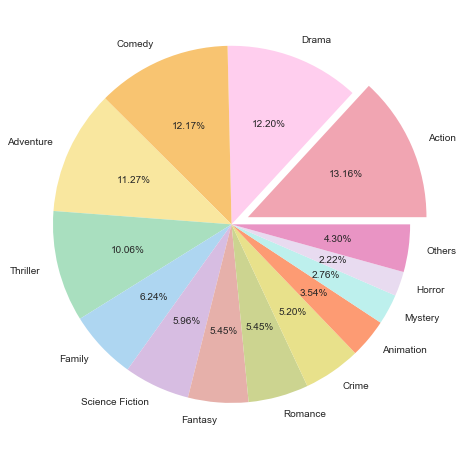

In [71]:
plt.figure(figsize=(8,8))
colors= ['#F1A5B2', '#FFCEEE','#F8C471', '#F9E79F', '#A9DFBF', '#AED6F1', '#D7BDE2', '#E6B0AA','#CCD490','#E8E18B','#FD9B73','#BDF0ED','#E8DBF0','#E994C4']
vals = s
labels = s.index.tolist()
plt.axis('equal') 
plt.pie(vals,labels=labels, autopct='%0.2f%%', explode= [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], colors=colors);

*Action, Drama, Comedy, Adventure and Thriller movies seem to be the money making genres*

### What keywords occur in high revenue movies?

In [72]:
df_comb = df_high.append(df_medium)
df_merged  = pd.merge(df_comb, keywords, on = 'id', how = 'inner', sort=False)
s = df_merged['keyword'].value_counts()
s.head()

based on novel          111
dystopia                 67
duringcreditsstinger     64
new york                 57
london                   48
Name: keyword, dtype: int64

In [73]:
# Create a list of word
keyword_count = s.to_dict()
text = keyword_count
#text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
img = 'thumbs-up.jpg'
mask = np.array(Image.open(img))

# Create the wordcloud object
wordcloud1 = WordCloud(width=480, height=480, margin=0, min_font_size=10, prefer_horizontal=0.8, background_color='white', mask=mask).generate_from_frequencies(text)
 


In [74]:
df_comb = df_low.append(df_very_low)
df_merged  = pd.merge(df_comb, keywords, on = 'id', how = 'inner', sort=False)
s = df_merged['keyword'].value_counts()
s.head()

independent film    129
sex                  91
woman director       91
based on novel       75
sport                65
Name: keyword, dtype: int64

In [75]:
# Create a list of word
keyword_count = s.to_dict()
text = keyword_count
img = 'thumbs-down.jpg'
mask = np.array(Image.open(img))
#text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
 
# Create the wordcloud object
wordcloud2 = WordCloud(width=480, height=480, margin=0,min_font_size=10, prefer_horizontal=0.8, background_color='white', mask=mask).generate_from_frequencies(text)
 

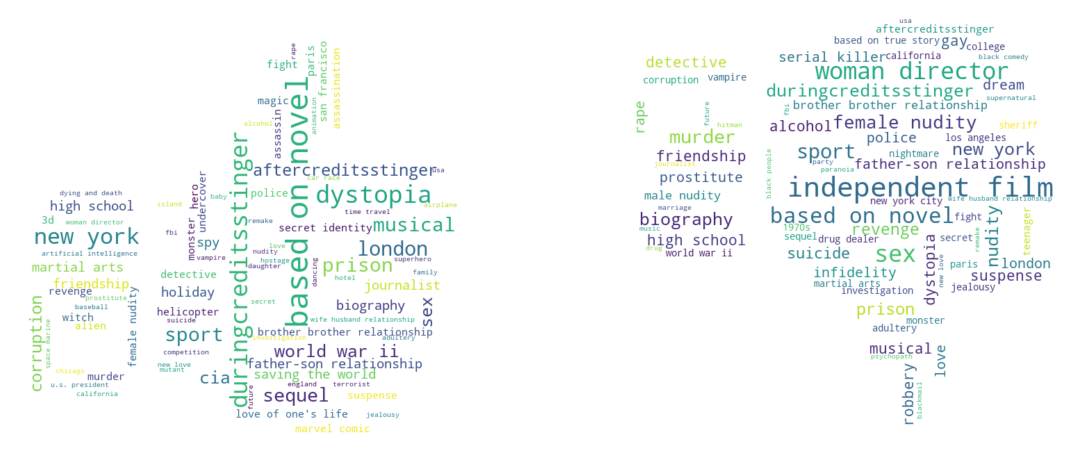

In [76]:
# Display the generated image:
fig = plt.figure(figsize=(20,8))

ax1 =plt.subplot(1,2,1)
ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis("off")
ax1.margins(x=0, y=0)

ax2 =plt.subplot(1,2,2)
ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis("off")
ax2.margins(x=0, y=0)



*Movies based on novels and those that have a dystopian theme tend to do well at the box office. Independent films and women directed films apparently do not do as well :(*

### Who are the people asssociated with popular high-revenue movies?
> - Who are the successful actors of all time?
- Who is the most successful actor by year?
- Who are the successful directors?
- Which are the successful production houses?  
- Among hit movies, which are the frequent collaborations between directors and actors?

In [77]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9'), 
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px'), ('padding', '15px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [78]:
df_pop = df.query('popularity_level == "very_popular"')
#popular movies that generate high revenues
df_high_and_pop =pd.merge(df_pop, df_high,  on = 'id', how = 'inner', sort=False)

df_cast = pd.merge(df_high_and_pop, cast, on='id', sort=False)[['original_title_x','revenue_adj_x','cast']]
df_director = pd.merge(df_high_and_pop,directors, on='id', sort=False)[['original_title_x','revenue_adj_x','director']]
df_prod = pd.merge(df_high_and_pop, production_companies, on='id', sort=False)[['original_title_x','revenue_adj_x','production_companies']]
df_cast.columns =['title', 'revenue', 'cast']
df_director.columns=['title', 'revenue', 'director']
df_prod.columns=['title', 'revenue', 'production_house']

df_da = pd.merge(df_director, df_cast, on ='id', sort=False)[['director', 'cast', 'title_x', 'title_y', 'revenue_x']]
df_da.columns = ['director', 'cast', 'title', 'number_of_collabs', 'revenue']


In [79]:
n =2

### Who are the successful actors of all time?

In [80]:
f={'revenue':'sum', 'title': lambda x: x.astype(str).values.tolist()[:n]}
df_cast_best = df_cast.groupby('cast').agg(f)
df_cast_best=df_cast_best.nlargest(10, columns='revenue')

(df_cast_best.style.set_table_styles(styles))
df_cast_best.columns=['revenue', 'some featured movies']
df_cast_best
#cm = sns.light_palette("seagreen", as_cmap=True)
#styled_table = df_cast_best.style.background_gradient(cmap=cm)
#df_cast_best.revenue= df_cast_best.revenue.apply(make_float)
#styled_table

,revenue,some featured movies
cast,,
Harrison Ford,1.284758e+10,"[Star Wars: The Force Awakens, The Expendables 3]"
Tom Cruise,1.041405e+10,"[Mission: Impossible - Rogue Nation, Edge of T..."
Tom Hanks,9.138795e+09,"[Bridge of Spies, Angels & Demons]"
Emma Watson,8.688910e+09,"[Noah, Harry Potter and the Half-Blood Prince]"
Daniel Radcliffe,8.354888e+09,"[Harry Potter and the Half-Blood Prince, Harry..."
Rupert Grint,8.354888e+09,"[Harry Potter and the Half-Blood Prince, Harry..."
Ian McKellen,7.772299e+09,"[The Hobbit: The Battle of the Five Armies, X-..."
Will Smith,7.572923e+09,"[Focus, Wild Wild West]"
Carrie Fisher,7.534156e+09,"[Star Wars: The Force Awakens, Star Wars]"


### Who is the most successful actor by year?

In [81]:
df_actor_yr = pd.merge(df_high_and_pop, cast, on='id')[['cast', 'release_year_x', 'revenue_adj_x', 'original_title_x']]
df_actor_yr.columns =['cast', 'year', 'revenue', 'title']

In [82]:
f ={'revenue':sum}
# step 1: revenue by year for each cast
df_actor_yr = df_actor_yr.groupby(['year', 'cast']).agg(f)
df_actor_yr.reset_index(inplace=True)
#step 2: 
df_actor_yr =df_actor_yr.loc[df_actor_yr.groupby('year')['revenue'].idxmax(),:]
df_actor_yr.set_index('year', inplace=True)
(df_actor_yr.style.set_table_styles(styles))

,cast,revenue
year,,
1960,Charles Laughton,4.42378e+08
1961,Ben Wright,1.57481e+09
1962,Alec Guinness,5.04591e+08
1963,Bernard Lee,5.61773e+08
1964,Gert FrÃ¶be,8.7808e+08
1965,Christopher Plummer,1.12953e+09
1967,George Sanders,1.34555e+09
1968,Maurice Evans,4.18709e+08
1969,Henry Jones,6.08151e+08


### Who are the successful directors?

In [83]:
f={'revenue':'sum', 'title': lambda x: x.astype(str).values.tolist()[:n]}
df_director_best = df_director.groupby('director').agg(f)
df_director_best = df_director_best.nlargest(10, columns='revenue')
df_director_best.columns = ['revenue', 'some featured movies']
(df_director_best.style.set_table_styles(styles))

,revenue,some featured movies
director,,
Steven Spielberg,1.45083e+10,"['Bridge of Spies', 'Close Encounters of the Third Kind']"
James Cameron,7.30702e+09,"['Avatar', 'True Lies']"
Peter Jackson,6.87911e+09,"['The Hobbit: The Battle of the Five Armies', 'The Lord of the Rings: The Fellowship of the Ring']"
George Lucas,5.73601e+09,"['Star Wars', 'Star Wars: Episode I - The Phantom Menace']"
Michael Bay,5.38001e+09,"['Transformers: Age of Extinction', 'Transformers: Revenge of the Fallen']"
Robert Zemeckis,5.3715e+09,"['A Christmas Carol', 'Forrest Gump']"
Tim Burton,4.24518e+09,"['Alice in Wonderland', 'Sleepy Hollow']"
David Yates,4.17746e+09,"['Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows: Part 1']"
Roland Emmerich,4.07681e+09,"['2012', '10,000 BC']"


### Which are the successful production houses?


In [84]:
f={'revenue':'sum', 'title': lambda x: x.astype(str).values.tolist()[:n]}
df_prod_best = df_prod.groupby('production_house').agg(f)
df_prod_best = df_prod_best.nlargest(10, columns='revenue')
df_prod_best.columns = ['revenue', 'some featured movies']
(df_prod_best.style.set_table_styles(styles))

,revenue,some featured movies
production_house,,
Warner Bros.,5.34605e+10,"['Jupiter Ascending', 'San Andreas']"
Universal Pictures,4.39582e+10,"['Furious 7', 'Minions']"
Paramount Pictures,4.17545e+10,"['Terminator Genisys', 'Mission: Impossible - Rogue Nation']"
Twentieth Century Fox Film Corporation,3.93734e+10,"['The Martian', 'Taken 3']"
Walt Disney Pictures,3.28573e+10,"['Inside Out', 'Cinderella']"
Columbia Pictures,2.42567e+10,"['Spectre', 'Pixels']"
Amblin Entertainment,1.90305e+10,"['Jurassic World', 'Bridge of Spies']"
New Line Cinema,1.63539e+10,"['San Andreas', 'Straight Outta Compton']"
DreamWorks SKG,1.4395e+10,"['Bridge of Spies', 'Need for Speed']"


### Among hit movies, which are the most frequent collaborations between directors and actors?

In [85]:
f={'title': lambda x: x.astype(str).values.tolist()[:n], 'number_of_collabs':'count'}
#df_da.title.apply()
df_da = df_da.groupby(['director', 'cast']).agg(f)
df_da.reset_index(inplace=True)
df_da = df_da.nlargest(10,columns='number_of_collabs')
df_da.columns = ['director', 'cast', 'some featured movies', 'number_of_collaborations']
(df_da.style.set_table_styles(styles))

,director,cast,some featured movies,number_of_collaborations
889,Clint Eastwood,Clint Eastwood,"['Gran Torino', 'Million Dollar Baby']",7
1195,Dennis Dugan,Adam Sandler,"['Grown Ups', 'Big Daddy']",7
3500,Peter Jackson,Ian McKellen,"['The Hobbit: The Battle of the Five Armies', 'The Lord of the Rings: The Fellowship of the Ring']",6
4823,Tim Burton,Helena Bonham Carter,"['Alice in Wonderland', 'Planet of the Apes']",6
3797,Richard Donner,Mel Gibson,"['Conspiracy Theory', 'Lethal Weapon 3']",5
4752,Sylvester Stallone,Sylvester Stallone,"['The Expendables', 'Rocky IV']",5
4828,Tim Burton,Johnny Depp,"['Alice in Wonderland', 'Sleepy Hollow']",5
5003,Tony Scott,Denzel Washington,"['The Taking of Pelham 1 2 3', 'Unstoppable']",5
362,Barry Sonnenfeld,Will Smith,"['Wild Wild West', 'Men in Black II']",4
857,Christopher Nolan,Michael Caine,"['Interstellar', 'The Dark Knight']",4


<a id='conclusions'></a>
## Conclusions

> **Summary**  
- Movies are becoming more popular with time
- Adventure, Fantasy and Action seem to be the favourite genres
- Movie runtimes are decreasing 
- High revenue movies are generally more popular
- Average runtime of high revenue movies is about 116 minutes and average budget is around 80 Million dollars
- Money making genres comprise of Drama, Action, Adventure, Comedy and Thriller
- Harrison Ford, Tom Cruise, Tom Hanks and the Harry Potter cast seem to have been the most successful cast members
- Steven Spielberg, James Cameron and Peter Jackson seem to be the most successful directors
- Warner Bros. ,Universal Pictures and Paramount Pictures are the leading production houses

>**Limitations**
- Many budget and revenue values were missing and therefore have been ignored. This may have affected the conclusions.
- Success of cast members is computed on revenue of movie and not on actual salary received by the cast.
- Correlation does not imply Causation

>** References**
- Stack Overflow
- python-graph-gallery.com